In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import os, re
sns.set()
sns.set_context('talk')
colours = itertools.cycle(sns.color_palette('Set2'))
palettes = itertools.cycle([sns.color_palette('PuBuGn_d'), sns.color_palette('BuGn_r'), sns.color_palette('GnBu_d')])
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [8.0, 6.0]

In [3]:
path = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/Adverbly_adjectives/COCA/all_years/'
coca_by_genre = [f for f in os.listdir(path) if f.endswith('_all_years.csv')]
coca_wordcount = pd.read_excel('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Adverbly_adjectives/COCA/coca_wordcount.xlsx', header=[1])

file_genre_dict = {
    'fic' : 'Fiction',
    'spok' : 'Spoken',
    'news' : 'News',
    'acad' : 'Academic',
    'mag' : 'Magazine'
}

genre_count_dict = {}

for f in coca_by_genre:
    df = pd.read_csv(path+f)
    short_name = f.split('_all_years.csv')[0]
    genre = file_genre_dict[short_name]
    genre_count_dict[genre] = len(df.index) / coca_wordcount.loc['Grand Total'][short_name.upper()]
    
coca_genre_counts = pd.DataFrame.from_dict(genre_count_dict, orient='index').reset_index().rename(columns={'index' : 'genre', 0 : 'count'})

In [4]:
path = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/Adverbly_adjectives/COCA/COCA_smaller_periods/'
coca_by_year = [f for f in os.listdir(path) if re.search('_\d\d\d\d\.csv$', f)]

year_count_dict = {}

for f in coca_by_year:
    df = pd.read_csv(path+f)
    year = re.search('\d\d\d\d', f).group(0)
    
    year_count_dict[year] = len(df.index)+year_count_dict[year] if year in year_count_dict else len(df.index)
    
for year in year_count_dict:
    totals = sum([coca_wordcount['Total'].loc[y] for y in range(int(year),int(year)+5)])
    year_count_dict[year] = year_count_dict[year] / totals
    
coca_year_counts = pd.DataFrame.from_dict(year_count_dict, orient='index').reset_index().rename(columns={'index' : 'year', 0 : 'count'})
coca_year_counts['timestamp'] = pd.to_datetime(coca_year_counts['year'])

In [34]:
path = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/Adverbly_adjectives/CORE/data/'
core_by_genre = [f for f in os.listdir(path) if (re.search('CORE_.*\.xlsx$', f) and not(f == 'CORE_allgenres.xlsx'))]

core_wordcount = pd.read_excel('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Adverbly_adjectives/CORE/CORE_summary.xlsx').dropna(subset=['SUBGENRE', 'GENRE'], how='all')[['GENRE', 'TOTAL WORDS']].fillna(method='ffill').groupby('GENRE').sum()

file_genre_dict = {
    'opinion' : 'Opinion',
    'htinstr' : 'How-to / Instructional',
    'infodesc' : 'Information Description',
    'narrative' : 'Narrative',
    'infopers' : 'Information Persuason', ### TODO
    'spoken' : 'Spoken',
    'interdisc' : 'Interactive Discussion',
    'lyrical' : 'Lyrical'
}

genre_count_dict = {}
for f in core_by_genre:
    df = pd.read_excel(path+f, usecols=[0])
    short_name = f.split('CORE_')[1].split('.xlsx')[0]
    genre = file_genre_dict[short_name]
    genre_count_dict[genre] = len(df.index) / core_wordcount['TOTAL WORDS'].loc[genre]
    
core_genre_counts = pd.DataFrame.from_dict(genre_count_dict, orient='index').reset_index().rename(columns={'index' : 'genre', 0 : 'count'})

In [35]:
path = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/Adverbly_adjectives/TIME/data/'
time_by_genre = [f for f in os.listdir(path)]

time_wordcount = pd.read_excel('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Adverbly_adjectives/TIME/TIME_summary.xlsx', header=0, sheetname='word count', index_col=0)

year_count_dict = {}

for f in time_by_genre:
    df = pd.read_table(path+f, skiprows=3, header=None, usecols=[0,1,2,3]).drop([0,1], axis=1)[:-2]
    year = f.split('.txt')[0]
    year_count_dict[year] = len(df.index) / time_wordcount['# words'].loc[int(year)]
    
time_year_counts = pd.DataFrame.from_dict(year_count_dict, orient='index').reset_index().rename(columns={'index' : 'year', 0 : 'count'})
time_year_counts['timestamp'] = pd.to_datetime(time_year_counts['year'])

In [82]:
path = './POS/'
files_by_genre = [path+d+'/'+f for d in os.listdir(path) if os.path.isdir(path+d) for f in os.listdir(path+d)]

counter = 0
for f in files_by_genre:
    df = pd.read_csv(f, encoding='latin1', skiprows=[0], sep='\t', error_bad_lines=False, quoting=3, lineterminator='\r', header=None, index_col=None, names=['word', 'lemma', 'pos'])
    print(df[df['pos'].str[0] == 'j'].head())

             word       lemma pos
17         \nreal        real  jj
49   \nelectrical  electrical  jj
57     \npersonal    personal  jj
123    \nnewfound    newfound  jj
130    \neconomic    economic  jj
          word     lemma      pos
11  \ndisabled  disabled       jj
24  \ninformed  informed  jj@_vvn
25     \nWhite     white       jj
49  \ndisabled  disabled       jj
80  \npre-game   pregame        j
                  word             lemma      pos
5             \nsingle            single  jj_nn1@
24  \nlarger-than-life  larger-than-life       jj
29            \nnarrow            narrow       jj
44            \njagged            jagged       jj
52           \ncertain           certain       jj
            word      lemma         pos
48    \nAmerican   american          jj
64      \nbetter     better         jjr
85     \nretired    retired  jj_vvn_vvd
101    \nonetime   one-time          jj
102  \ndefensive  defensive          jj
              word        lemma    pos
4           \

KeyboardInterrupt: 

## Plotting functions

In [36]:
def plotCountByColumn(data, column, title, orient='v'):
    if (orient == 'v'):
        sns.barplot(y='count', x=column, data=data, palette=next(palettes), orient=orient)
    else:
        sns.barplot(x='count', y=column, data=data, palette=next(palettes), orient=orient)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.title(title)

In [37]:
def scatterPlotOverTime(data, timestamp_col, y_col, title, regression=True):
    
    x = [d.to_pydatetime() for d in data[timestamp_col]]
    epoch = (data[timestamp_col] - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s')
    y = [c for c in data[y_col]]

    rp = sns.regression._RegressionPlotter(epoch, y, ci=95)
    min_x = epoch.min()
    max_x = epoch.max()
    grid, yhat, err_bands = rp.fit_regression(x_range=(min_x,max_x))
    grid = grid.astype('datetime64[s]')
    
    sns.scatterplot(x=x, y=y)
    if regression:
        sns.lineplot(grid,yhat)
        plt.fill_between(grid,err_bands[0,:],err_bands[1,:],alpha=.5)
    
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(data[timestamp_col].min()-pd.Timedelta('432000 m'), data[timestamp_col].max()+pd.Timedelta('432000 m'))
    plt.title(title)

## Genre plots

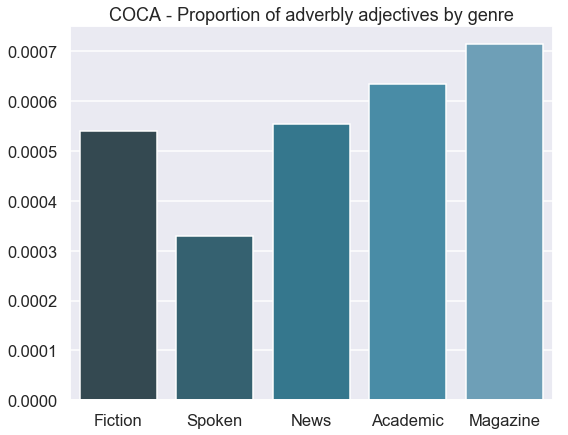

In [38]:
plotCountByColumn(coca_genre_counts, 'genre', 'COCA - Proportion of adverbly adjectives by genre')

(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025]),
 <a list of 6 Text xticklabel objects>)

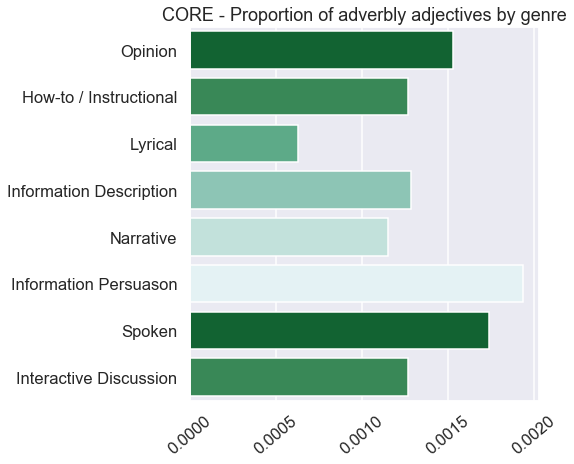

In [39]:
plotCountByColumn(core_genre_counts, 'genre', 'CORE - Proportion of adverbly adjectives by genre', orient='h')
plt.xticks(rotation=40)

## Time plots

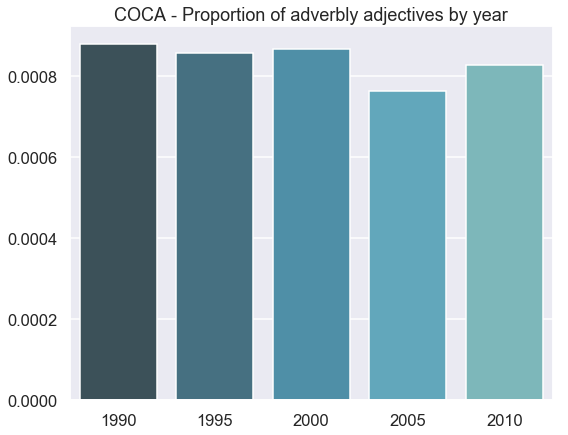

In [40]:
plotCountByColumn(coca_year_counts, 'year', 'COCA - Proportion of adverbly adjectives by year')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


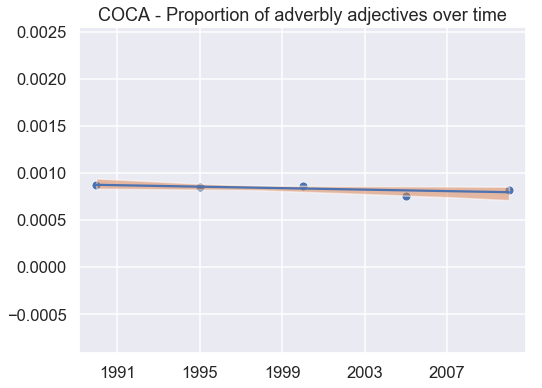

In [41]:
scatterPlotOverTime(coca_year_counts, 'timestamp', 'count', 'COCA - Proportion of adverbly adjectives over time')

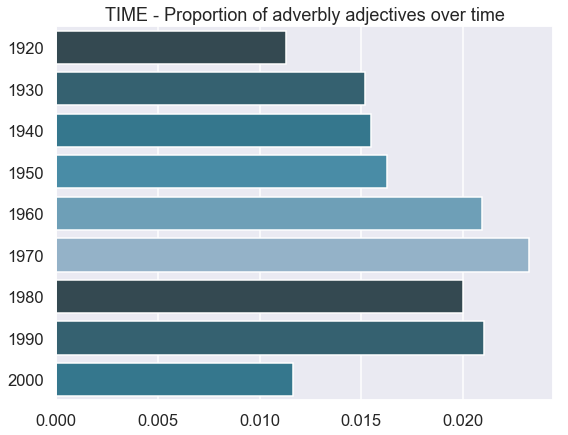

In [42]:
time_year_counts['decade'] = (np.floor(time_year_counts['year'].astype(int) / 10) * 10).astype(int)
time_decade_counts = time_year_counts.groupby('decade').sum().reset_index()
plotCountByColumn(time_decade_counts, 'decade', 'TIME - Proportion of adverbly adjectives over time', orient='h')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 0.004233466919882915)

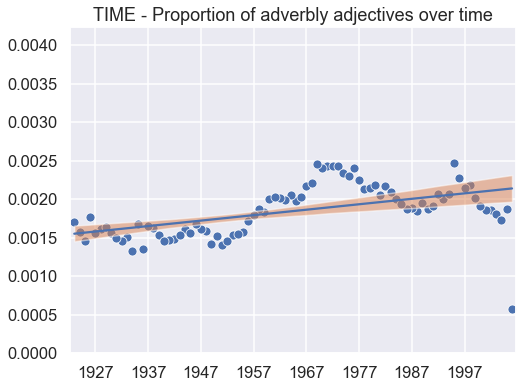

In [43]:
scatterPlotOverTime(time_year_counts, 'timestamp', 'count', 'TIME - Proportion of adverbly adjectives over time', regression=True)
plt.ylim(0)

## Proportion of adjectives

## Experimentation

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


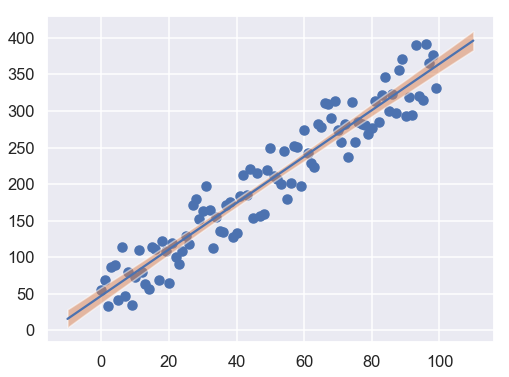

In [25]:
x = np.arange(100)
y = np.arange(100)*3.2 + np.random.rand(100)*100 

rp = sns.regression._RegressionPlotter(x,y, ci=95)
grid, yhat, err_bands = rp.fit_regression(x_range=(-10,110))
plt.plot(grid,yhat)
plt.scatter(x,y)
plt.fill_between(grid,err_bands[0,:],err_bands[1,:],alpha=.5)